# 와인 품질 예측 모델 만들기

# 와인 품질 데이터의 기술 통계 및 통계적 검정

# 그룹의 분포, 히스토그램, t 검정

In [2]:
# 와인 데이터 가져오기
import pandas as pd

URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"
redwine = pd.read_csv(URL + "winequality-red.csv", sep=";", header=0)
redwine["type"] = "red"
whitewine = pd.read_csv(URL + "winequality-white.csv", sep=";", header=0)
whitewine["type"] = "white"
wine = redwine.append(whitewine)
wine.columns = wine.columns.str.replace(" ", "_")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### 와인 종류별 품질의 기술 통계량

In [3]:
wine.groupby("type")["quality"].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


- 와인 종류 => red, white

- 레드, 화이트 와인의 요약 통계량 결과 출력

### 와인 종류별 품질의 사분위수

In [6]:
wine.groupby("type")["quality"].quantile([0, 0.25, 0.5, 0.75, 1]).unstack("type")

type,red,white
0.00,3.0,3.0
0.25,5.0,5.0
0.50,6.0,6.0
0.75,6.0,6.0
1.00,8.0,9.0


- quantile를 쓸 때, 리스트를 구분해 Q1 ~ Q5, 5개에 대한 변수 정보가 담김

- unstack() ==> DataFrame으로 됨

### 와인 종류별 품질의 분포

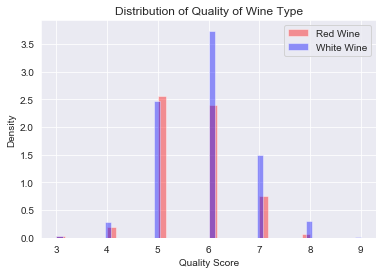

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

red_q = wine.loc[wine["type"] == "red", "quality"]
white_q = wine.loc[wine["type"] == "white", "quality"]

sns.set_style("darkgrid")
sns.distplot(red_q, norm_hist=True, kde=False, color="red", label="Red Wine")
sns.distplot(white_q, norm_hist=True, kde=False, color="blue", label="White Wine")

plt.title("Distribution of Quality of Wine Type")
plt.xlabel("Quality Score")
plt.ylabel("Density")
plt.legend();

- sns는 plt를 보다 더 좋게 꾸며주는 용도로 사용

- sns는 분포 플롯(distplot) 등 편리하게 사용할 수 있는 플롯이 많음
    - kde: 커널 밀도 

- quality score가 5 ~ 7에 걸쳐져 있는 것을 확인할 수 있음

### 와인 종류별 품질 차이의 통계적 유의성 검정

In [12]:
wine.groupby("type")["quality"].aggregate(["std", "mean"])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [15]:
import statsmodels.api as sm

t_stat, p_value, df = sm.stats.ttest_ind(red_q, white_q)
print(f"t-stat: {t_stat:.3f}, p-value: {p_value:.4f}")

t-stat: -9.686, p-value: 0.0000


- 모집단이 2개(red, white) 이므로 t-test 사용

- 귀무가설: 와인 종류별 품질의 차이는 없다.

- p-value가 0.05보다 작으면 평균에 차이가 있음을 의미함

- p-value가 0.05보다 크면 평균 차이가 없으므로 귀무가설을 채택함

- t_stat: t 통계량

- p_value: p-value

- df: degree of freedom, 밀도함수를 그릴 때 함수의 기울기